In [20]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import app

In [2]:
url = 'https://data.pmel.noaa.gov/generic/erddap/tabledap/pirata_hourly_temp.csv?TEMP,time,site_code,depth&time%3E=1998-01-22&time%3C=2022-05-22&site_code=%2220n38w%22&orderByClosest(%22depth%2Ctime/2day%22)'

In [4]:
df = pd.read_csv(url, skiprows=[1])
df

,TEMP,time,site_code,depth
0,23.471,2017-03-17T01:00:00Z,20n38w,1.0
1,23.549,2017-03-19T00:00:00Z,20n38w,1.0
2,23.566,2017-03-21T00:00:00Z,20n38w,1.0
3,23.568,2017-03-23T00:00:00Z,20n38w,1.0
4,23.521,2017-03-25T00:00:00Z,20n38w,1.0
...,...,...,...,...
10544,12.000,2022-05-14T00:00:00Z,20n38w,500.0
10545,12.230,2022-05-16T00:00:00Z,20n38w,500.0
10546,12.090,2022-05-18T00:00:00Z,20n38w,500.0
10547,11.570,2022-05-20T00:00:00Z,20n38w,500.0


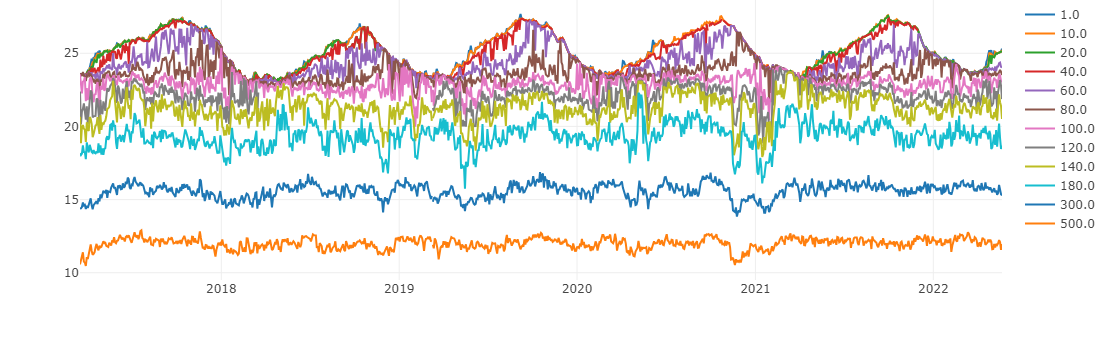

In [34]:
df.loc[:, 'time'] = pd.to_datetime(df['time'])
depths = df['depth'].unique()
gapped = []
figure = go.Figure()
for depth in depths:
    ddf = df.loc[df['depth']==depth]
    fdf = app.make_gaps(ddf, '48H')
    trace = px.line(fdf, x='time', y='TEMP',)
    trace.update_traces(name=str(depth))
    figure.add_trace(list(trace.select_traces())[0])
figure.update_traces(showlegend=True)
figure.show(config={'displayModeBar': False})